In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from perceptron_surgical import Perceptron

In [2]:
data = pd.read_csv("input/Surgical-deepnet.csv")
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [3]:
X = data.drop("complication", axis=1).copy().values
Y = data['complication'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((11708, 24), (11708,), (2927, 24), (2927,))

In [4]:
perceptron = Perceptron(input_length=24, learning_rate=0.001)
perceptron.fit(X_train, Y_train, 10, "sigmoid")

100%|██████████| 10/10 [00:01<00:00,  7.51it/s]


In [5]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 50
model_2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model_2.activation(x_train @ model_2.weights + model_2.bias, "sigmoid")
        error = y_pred - y_train
        model_2.weights = model_2.weights - model_2.learning_rate * error * x_train
        model_2.bias = model_2.bias - model_2.learning_rate * error

    train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, "sigmoid")
    test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, "sigmoid")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 50/50 [00:55<00:00,  1.12s/it]


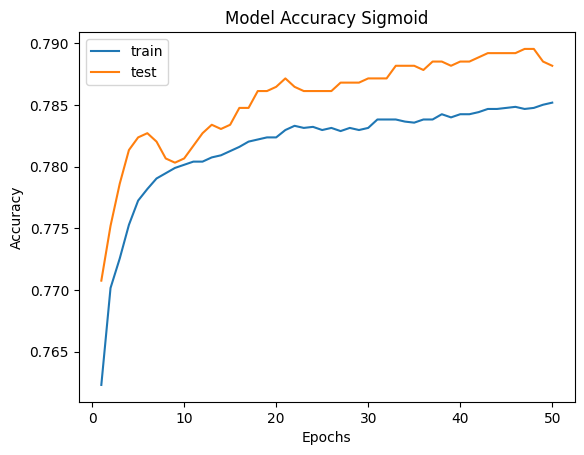

In [6]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Sigmoid")
plt.legend()
plt.show()

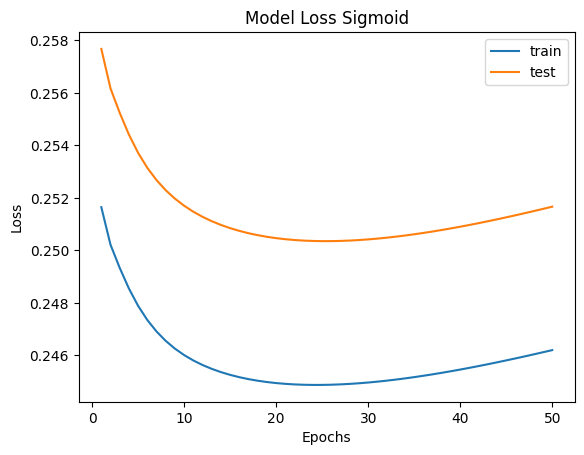

In [7]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Sigmoid")
plt.legend()
plt.show()

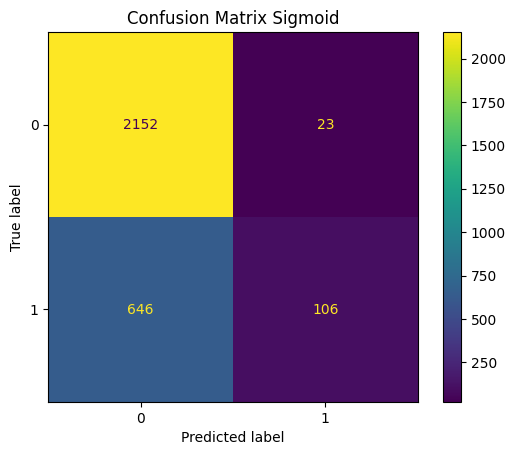

In [30]:
y_pred = model_2.predict(X_test, "sigmoid")
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title("Confusion Matrix Sigmoid")
plt.show()

In [9]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 50
model_2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model_2.activation(x_train @ model_2.weights + model_2.bias, "relu")
        error = y_pred - y_train
        model_2.weights = model_2.weights - model_2.learning_rate * error * x_train
        model_2.bias = model_2.bias - model_2.learning_rate * error

    train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, "relu")
    test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, "relu")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 50/50 [00:52<00:00,  1.04s/it]


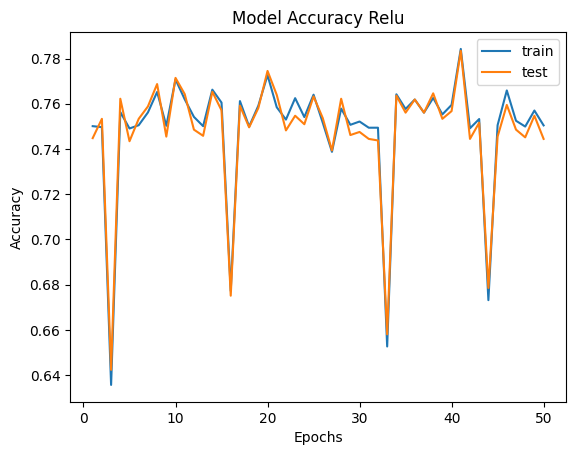

In [10]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Relu")
plt.legend()
plt.show()

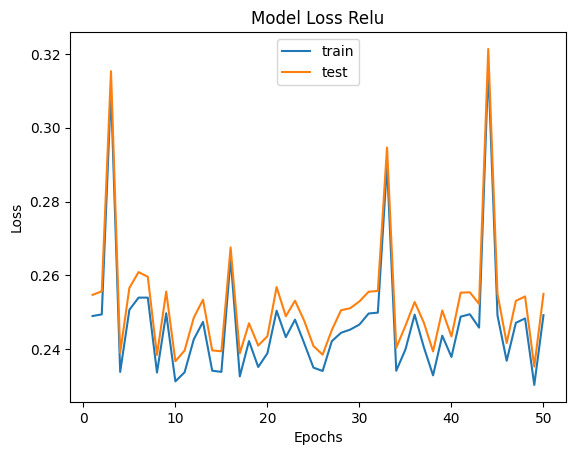

In [11]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Relu")
plt.legend()
plt.show()

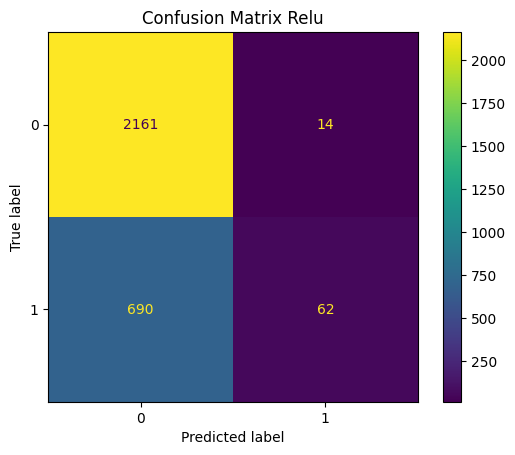

In [26]:
y_pred = model_2.predict(X_test, "relu")
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title("Confusion Matrix Relu")
plt.show()

In [13]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 50
model_2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model_2.activation(x_train @ model_2.weights + model_2.bias, "tanh")
        error = y_pred - y_train
        model_2.weights = model_2.weights - model_2.learning_rate * error * x_train
        model_2.bias = model_2.bias - model_2.learning_rate * error

    train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, "tanh")
    test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, "tanh")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


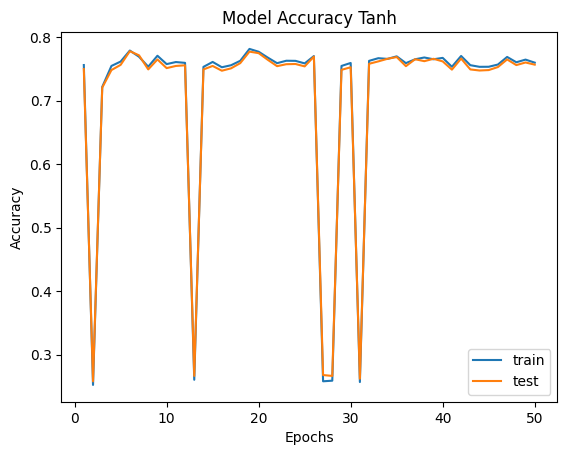

In [14]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Tanh")
plt.legend()
plt.show()

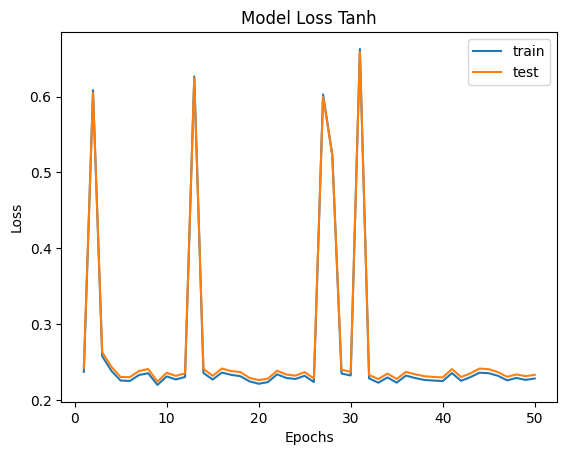

In [15]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Tanh")
plt.legend()
plt.show()

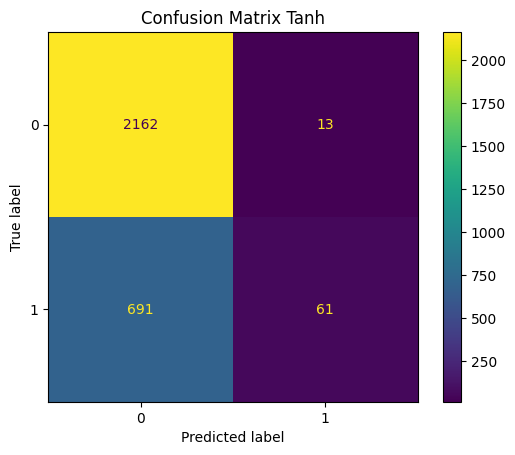

In [27]:
y_pred = model_2.predict(X_test, "tanh")
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title("Confusion Matrix Tanh")
plt.show()

In [17]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 50
model_2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model_2.activation(x_train @ model_2.weights + model_2.bias, "unitstep")
        error = y_pred - y_train
        model_2.weights = model_2.weights - model_2.learning_rate * error * x_train
        model_2.bias = model_2.bias - model_2.learning_rate * error

    train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, "unitstep")
    test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, "unitstep")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


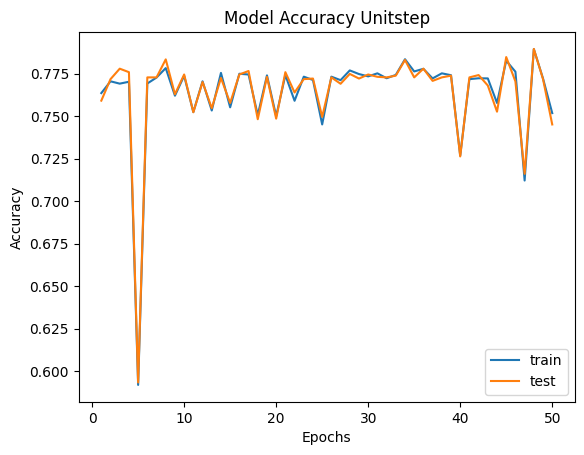

In [18]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Unitstep")
plt.legend()
plt.show()

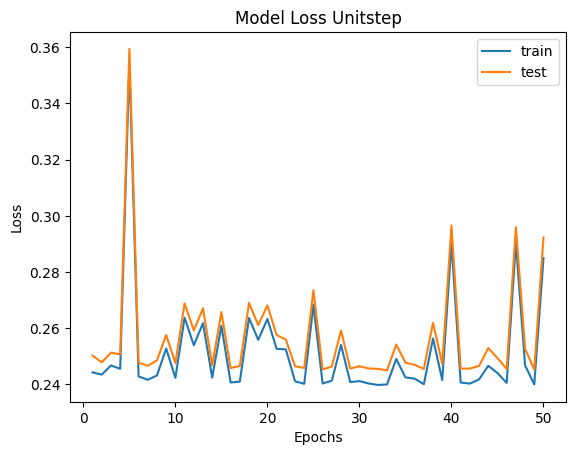

In [19]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Unitstep")
plt.legend()
plt.show()

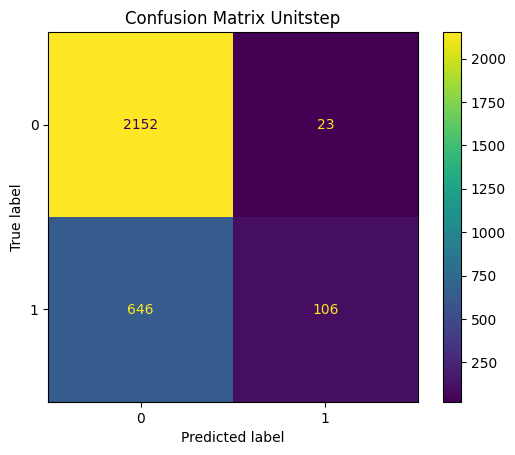

In [28]:
y_pred = model_2.predict(X_test, "unitstep")
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title("Confusion Matrix Unitstep")
plt.show()

In [21]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 50
model_2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model_2.activation(x_train @ model_2.weights + model_2.bias, "sign")
        error = y_pred - y_train
        model_2.weights = model_2.weights - model_2.learning_rate * error * x_train
        model_2.bias = model_2.bias - model_2.learning_rate * error

    train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, "sign")
    test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, "sign")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 50/50 [00:54<00:00,  1.08s/it]


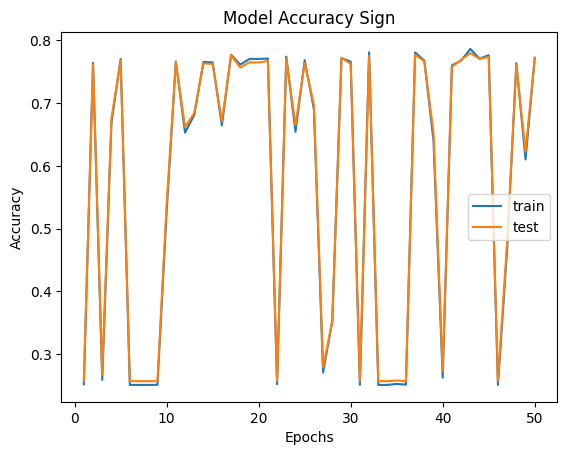

In [22]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Sign")
plt.legend()
plt.show()

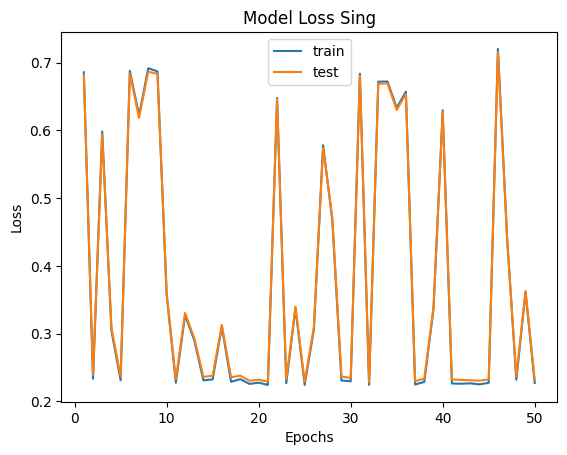

In [23]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Sing")
plt.legend()
plt.show()

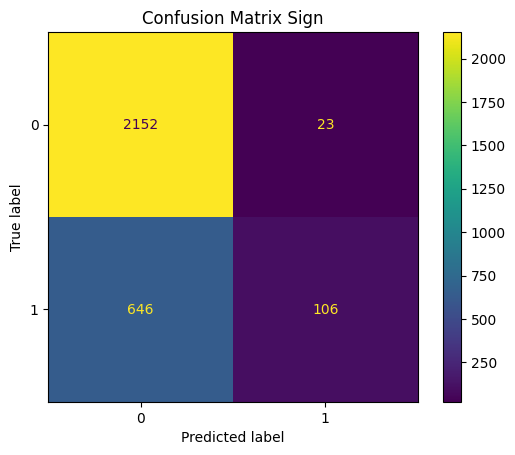

In [29]:
y_pred = model_2.predict(X_test, "unitstep")
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title("Confusion Matrix Sign")
plt.show()